## Final Project Submission

Please fill out: 
    
* Student name: Yvonne Kirigo
* Student pace: part time 
* Scheduled project review date/time: 18th February 2024
* Instructor name:Noah Kandie/ Sam G Mwangi / William Okomba 
* Blog post URL:

# Movies data analysis for Microsoft

### Problem Statement
##### Microsoft have decided to create a new movie studio as a new business line.
##### I have been charged with exploring what types of films are currently doing the best at the box office. 
##### My task is to translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Data Source

##### The data used in this analysis is from the folder zippedData which had movie datasets from the following sources:

###### Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers

### I start by importing the necessary libraries

In [1]:
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Next i load the data sets

In [2]:
# Loading the Bom Movie gross data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\bom.movie_gross.csv"
df1 = pd.read_csv(f)
df1.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [3]:
# renaming title column in df1 to primary_title to ease the merging

df1.rename(columns={'title' : 'primary_title'}, inplace = True)
print(df1.columns)

Index(['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [4]:
# Loading the title basics data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\title.basics.csv"
df5 = pd.read_csv(f)
df5.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# Loading the title ratings data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\title.ratings.csv"
df6 = pd.read_csv(f)
df6.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


##### I start merging the datasets to get as much data as i need for the analysis

In [6]:
# merging the title basics and title ratings data sets

merged_df = pd.merge(df5, df6, on='tconst', how='inner')
merged_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [7]:
# Loading the title crew data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\title.crew.csv"
df7 = pd.read_csv(f)
df7.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [8]:
# merging the  title basics, title ratings and title crew datasets

merged_df1 = pd.merge(merged_df, df7, on='tconst', how='inner')
merged_df1.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,NaN


In [9]:
# Loading the title akas data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\title.akas.csv"
df4 = pd.read_csv(f)
df4.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [10]:
# renaming title id column in df4 to tconst to ease the merging

df4.rename(columns={'title_id' : 'tconst'}, inplace = True)
print(df4.columns)

Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')


In [11]:
# checking if the change has reflected

df4.head(5)

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [12]:
# merge title basics, title ratings, title crew and title akas data sets

merged_df2 = pd.merge(merged_df1, df4, on='tconst', how='inner')
merged_df2.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,Sangharsh,IN,hi,NaN,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,Sunghursh,NaN,NaN,original,NaN,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3,Sunghursh,IN,NaN,NaN,NaN,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4,Sunghursh,IN,hi,NaN,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",5,Sungharsh,IN,hi,NaN,alternative spelling,0.0


In [13]:
# merge title basics, title ratings, title crew and title akas and bom movie gross data sets

merged_df3 = pd.merge(merged_df2, df1, on='primary_title', how='inner')
merged_df3.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,title,region,language,types,attributes,is_original_title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,Wazir,NaN,NaN,original,NaN,1.0,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,64 Squares,NaN,NaN,NaN,NaN,0.0,Relbig.,1100000.0,NaN,2016


In [14]:
# Loading the title principals data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\title.principals.csv"
df8 = pd.read_csv(f)
df8.head(5)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [15]:
# merge title basics, title ratings, title crew and title akas, bom movie gross and title principles data sets

merged_df4 = pd.merge(merged_df3, df8, on='tconst', how='inner')
merged_df4.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,is_original_title,studio,domestic_gross,foreign_gross,year,ordering_y,nconst,category,job,characters
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,1.0,Relbig.,1100000.0,NaN,2016,10,nm3871075,writer,dialogue,NaN
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,1.0,Relbig.,1100000.0,NaN,2016,1,nm0000821,actor,NaN,"[""Pandit Omkarnath Dhar""]"


Chceking the columns in the merged data set

In [16]:
merged_df4.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'ordering_x', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'ordering_y', 'nconst', 'category', 'job',
       'characters'],
      dtype='object')

In [17]:
# Loading the name basics data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\name.basics.csv"
df2 = pd.read_csv(f)
df2.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [18]:
# Loading the movie info data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\rt.movie_info.tsv"
df3 = pd.read_table(f)
df3.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [19]:
# Loading the reviews data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\rt.reviews.tsv"
df11 = pd.read_csv(f,sep = '\t',encoding = 'latin1')
df11.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [20]:
# Loading the movie data set

f = r"C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Assignments\DSC PHASE 1 PROJECT\zippedData\Movie_data.csv"
df12 = pd.read_csv(f)
df12.head(2)

,Unnamed: 0,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9-Dec-22,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386",NaN


In [21]:
# renaming movie column in df12 to title

df12.rename(columns={'Movie' : 'primary_title'}, inplace = True)
print(df12.columns)

Index(['Unnamed: 0', 'Release Date', 'primary_title', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross', 'Unnamed: 6'],
      dtype='object')


In [22]:
# merge title basics, title ratings, title crew and title akas, bom movie gross, movie budgets data sets,title principles, tmdb movies data sets and name basics

merged_df5 = pd.merge(merged_df4, df2, on='nconst', how='inner')
merged_df5.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,10,nm3871075,writer,dialogue,NaN,Abhijeet Shirish Deshpande,NaN,NaN,"writer,actor,director","tt2229842,tt8784906,tt2358412,tt0315642"
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",...,10,nm3871075,writer,dialogue,NaN,Abhijeet Shirish Deshpande,NaN,NaN,"writer,actor,director","tt2229842,tt8784906,tt2358412,tt0315642"


In [23]:
# merge title basics, title ratings, title crew and title akas, bom movie gross, movie budgets data sets,title principles, tmdb movies data sets and name basics

merged_df6 = pd.merge(merged_df5, df12, on='primary_title', how='inner')
merged_df6.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,birth_year,death_year,primary_profession,known_for_titles,Unnamed: 0,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Unnamed: 6
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN


In [24]:
merged_df6.shape

(340731, 37)

In [25]:
# Renaming our dataset

merged_data = merged_df6

### Display the top 5 Rows of the merged dataset

In [26]:
merged_data.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,birth_year,death_year,primary_profession,known_for_titles,Unnamed: 0,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Unnamed: 6
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,"nm0449616,nm1433580",...,NaN,NaN,"producer,director,actor","tt0337692,tt1650048,tt6543652,tt2427892","2,589",23-May-12,"$25,000,000","$720,828","$9,313,302",NaN


#### Display Last 5 Rows of the merged dataset

In [27]:
merged_data.tail(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,...,birth_year,death_year,primary_profession,known_for_titles,Unnamed: 0,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Unnamed: 6
340726,tt4333662,They Will Have to Kill Us First,They Will Have to Kill Us First,2015,100.0,Documentary,7.3,112,nm2162785,nm3139341,...,NaN,NaN,producer,tt4333662,"6,076",23-Oct-15,"$600,000",$0,"$7,943",NaN
340727,tt4333662,They Will Have to Kill Us First,They Will Have to Kill Us First,2015,100.0,Documentary,7.3,112,nm2162785,nm3139341,...,NaN,NaN,producer,tt4333662,"6,076",23-Oct-15,"$600,000",$0,"$7,943",NaN
340728,tt4333662,They Will Have to Kill Us First,They Will Have to Kill Us First,2015,100.0,Documentary,7.3,112,nm2162785,nm3139341,...,NaN,NaN,producer,tt4333662,"6,076",23-Oct-15,"$600,000",$0,"$7,943",NaN
340729,tt4333662,They Will Have to Kill Us First,They Will Have to Kill Us First,2015,100.0,Documentary,7.3,112,nm2162785,nm3139341,...,NaN,NaN,producer,tt4333662,"6,076",23-Oct-15,"$600,000",$0,"$7,943",NaN
340730,tt4333662,They Will Have to Kill Us First,They Will Have to Kill Us First,2015,100.0,Documentary,7.3,112,nm2162785,nm3139341,...,NaN,NaN,producer,tt4333662,"6,076",23-Oct-15,"$600,000",$0,"$7,943",NaN


#### Find the shape of the dataset (Number of Rows and Columns)

In [28]:
merged_data.shape

(340731, 37)

In [29]:
print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  340731
Columns:  37


### Data Cleaning

###### Start by getting information about the data set

In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340731 entries, 0 to 340730
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tconst              340731 non-null  object 
 1   primary_title       340731 non-null  object 
 2   original_title      340731 non-null  object 
 3   start_year          340731 non-null  int64  
 4   runtime_minutes     340394 non-null  float64
 5   genres              340637 non-null  object 
 6   averagerating       340731 non-null  float64
 7   numvotes            340731 non-null  int64  
 8   directors           340677 non-null  object 
 9   writers             339570 non-null  object 
 10  ordering_x          340731 non-null  int64  
 11  title               340731 non-null  object 
 12  region              325416 non-null  object 
 13  language            53023 non-null   object 
 14  types               247218 non-null  object 
 15  attributes          17020 non-null

### Checking for missing values in the dataset

In [31]:
print(merged_data.isnull().values.any())

True


In [32]:
# find number of missing values 

merged_data.isnull().sum()

tconst                     0
primary_title              0
original_title             0
start_year                 0
runtime_minutes          337
genres                    94
averagerating              0
numvotes                   0
directors                 54
writers                 1161
ordering_x                 0
title                      0
region                 15315
language              287708
types                  93513
attributes            323711
is_original_title          0
studio                     0
domestic_gross           340
foreign_gross          35723
year                       0
ordering_y                 0
nconst                     0
category                   0
job                   198527
characters            204405
primary_name               0
birth_year            104331
death_year            331776
primary_profession       205
known_for_titles         226
Unnamed: 0                 0
Release Date               0
Production Budget          0
Domestic Gross

In [33]:
# check percentage of missing values in the columns

merged_data.isnull().mean()*100

tconst                  0.000000
primary_title           0.000000
original_title          0.000000
start_year              0.000000
runtime_minutes         0.098905
genres                  0.027588
averagerating           0.000000
numvotes                0.000000
directors               0.015848
writers                 0.340738
ordering_x              0.000000
title                   0.000000
region                  4.494748
language               84.438457
types                  27.444817
attributes             95.004857
is_original_title       0.000000
studio                  0.000000
domestic_gross          0.099785
foreign_gross          10.484224
year                    0.000000
ordering_y              0.000000
nconst                  0.000000
category                0.000000
job                    58.265024
characters             59.990139
primary_name            0.000000
birth_year             30.619756
death_year             97.371827
primary_profession      0.060165
known_for_

##### The columns region, language, types, attributes, foreign gross, job,characters,birth year, death year contain a significant amount of missing data. I will drop these columns.

#### Drop the columns with significant amount of missing values

In [34]:
merged_data = merged_data.drop(['region','language','types','attributes','foreign_gross','job','characters','birth_year','death_year'], axis=1)

In [35]:
# check the remaining columns in the dataset

merged_data.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'ordering_x', 'title', 'is_original_title', 'studio',
       'domestic_gross', 'year', 'ordering_y', 'nconst', 'category',
       'primary_name', 'primary_profession', 'known_for_titles', 'Unnamed: 0',
       'Release Date', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'Unnamed: 6'],
      dtype='object')

In [36]:
# Recheck the missing data percentage

merged_data.isnull().mean()*100

tconst                  0.000000
primary_title           0.000000
original_title          0.000000
start_year              0.000000
runtime_minutes         0.098905
genres                  0.027588
averagerating           0.000000
numvotes                0.000000
directors               0.015848
writers                 0.340738
ordering_x              0.000000
title                   0.000000
is_original_title       0.000000
studio                  0.000000
domestic_gross          0.099785
year                    0.000000
ordering_y              0.000000
nconst                  0.000000
category                0.000000
primary_name            0.000000
primary_profession      0.060165
known_for_titles        0.066328
Unnamed: 0              0.000000
Release Date            0.000000
Production Budget       0.000000
Domestic Gross          0.000000
Worldwide Gross         0.000000
Unnamed: 6            100.000000
dtype: float64

The missing data has now been dropped

Check for duplicate data

In [37]:
# Check any duplicate data

dup_merged_data = merged_data.duplicated().sum()
print(dup_merged_data)

0


In [38]:
# Check shape of the data

print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  340731
Columns:  28


In [39]:
merged_data.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'ordering_x', 'title', 'is_original_title', 'studio',
       'domestic_gross', 'year', 'ordering_y', 'nconst', 'category',
       'primary_name', 'primary_profession', 'known_for_titles', 'Unnamed: 0',
       'Release Date', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'Unnamed: 6'],
      dtype='object')

The dataset has a number of columns that are irrelevant to the analysis, i will drop these columns to further refine these dataset

In [40]:
# drop unnecessary columns
merged_data = merged_data.drop(['Release Date','original_title','Unnamed: 0','Domestic Gross','studio','writers','is_original_title','domestic_gross','primary_profession','ordering_x','ordering_y','known_for_titles','Unnamed: 6'], axis=1)


In [41]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross'],
      dtype='object')

In [42]:
# Check shape of the data after dropping unnecessary columns

print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  340731
Columns:  15


In [43]:
merged_data.head(2)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,En el camino,2012,nm0439768,producer,Nathanaël Karmitz,"$25,000,000","$9,313,302"
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,On the Road - Unterwegs,2012,nm0439768,producer,Nathanaël Karmitz,"$25,000,000","$9,313,302"


In [44]:
# Filetring the data in the column category to only remain with directors to eliminate unnecessary duplicates. I will focus on directors in this particular analysis as their input to the success of a movie is key

merged_data = merged_data[merged_data['category']=='director']


In [45]:
#  Check shape of the data after filtering directors in category column

print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  36986
Columns:  15


In [46]:
# Keep checking for ways to elimninate unnecessary duplicates in the movie title names. 
#Concatenate the tconst and primary name columns to get a unique term

merged_data['comb_tconst_priname'] = merged_data['tconst'] + merged_data['primary_name']

In [47]:
# Check the new column created

merged_data.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,comb_tconst_priname
140,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,En el camino,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles
141,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,On the Road - Unterwegs,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles
142,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,Na Estrada,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles
143,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,W drodze,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles
144,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,Pela Estrada Fora,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles


In [48]:
# Check shape of the data after creating the new column

print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  36986
Columns:  16


In [49]:
# check for duplicates in the combined column

dup_values = merged_data['comb_tconst_priname'].duplicated()
print(dup_values)


140       False
141        True
142        True
143        True
144        True
          ...  
340706    False
340707     True
340708     True
340709     True
340710     True
Name: comb_tconst_priname, Length: 36986, dtype: bool


##### There are some duplicates in the combined column. I next drop these duplicates.

In [50]:
# Drop the duplicates based on the combined column

merged_data = merged_data.drop_duplicates(subset=['comb_tconst_priname'])
merged_data

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,comb_tconst_priname
140,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,En el camino,2012,nm0758574,director,Walter Salles,"$25,000,000","$9,313,302",tt0337692Walter Salles
286,tt4339118,On the Road,2014,89.0,Drama,6.0,6,nm7042169,Wo zai lu shang zui ai ni,2012,nm7042169,director,Poong-ki Kim,"$25,000,000","$9,313,302",tt4339118Poong-ki Kim
305,tt5647250,On the Road,2016,121.0,Drama,5.7,127,nm0935863,Love Song: Wolf Alice,2012,nm0935863,director,Michael Winterbottom,"$25,000,000","$9,313,302",tt5647250Michael Winterbottom
400,tt1233192,Brighton Rock,2010,111.0,"Crime,Drama,Thriller",5.7,5784,nm0423626,Le rocher de Brighton,2011,nm0423626,director,Rowan Joffe,"$11,000,000","$229,653",tt1233192Rowan Joffe
648,tt1374989,Pride and Prejudice and Zombies,2016,108.0,"Action,Comedy,Horror",5.8,46187,nm0824882,"Orgullo, prejuicio y zombies",2016,nm0824882,director,Burr Steers,"$28,000,000","$16,638,300",tt1374989Burr Steers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340515,tt2627798,The Last Station,2011,NaN,Drama,3.8,6,nm1184976,The Last Station,2010,nm1184976,director,Shapur Gharib,"$18,000,000","$15,696,146",tt2627798Shapur Gharib
340519,tt3436064,The Last Station,2012,90.0,Documentary,7.6,10,"nm5538918,nm1886657",La última estación,2010,nm1886657,director,Cristian Soto,"$18,000,000","$15,696,146",tt3436064Cristian Soto
340522,tt3436064,The Last Station,2012,90.0,Documentary,7.6,10,"nm5538918,nm1886657",La última estación,2010,nm5538918,director,Catalina Vergara,"$18,000,000","$15,696,146",tt3436064Catalina Vergara
340606,tt4291600,Lady Macbeth,2016,89.0,"Drama,Romance",6.8,15269,nm4399706,Λαίδη Μάκμπεθ,2017,nm4399706,director,William Oldroyd,"$650,000","$6,477,294",tt4291600William Oldroyd


In [51]:
# Check shape of the data after dropping

print("Rows: ", merged_data.shape[0])
print("Columns: ", merged_data.shape[1])

Rows:  1561
Columns:  16


##### Next is to make The Worldwide gross and the production budget columns into floats to enable measues of dispersion computations.  I do this by removing the dollar ($) sign and the comma (,) from these columns 

In [52]:
# remove the $ sign and comma from the worldwide gross column

merged_data['Worldwide Gross'] = merged_data['Worldwide Gross'].str.replace('$','')

In [53]:
merged_data['Worldwide Gross'] = merged_data['Worldwide Gross'].str.replace(',','').astype(float)

In [54]:
# remove the $ sign and comma from the production budget column

merged_data['Production Budget'] = merged_data['Production Budget'].str.replace('$','')

In [55]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'comb_tconst_priname'],
      dtype='object')

In [56]:
merged_data['Production Budget'] = merged_data['Production Budget'].str.replace(',','').astype(float)

In [57]:
# Create a new column Movie_profit which is the difference between the Worldwide gross and the production budget

merged_data['movie_profit'] = merged_data['Worldwide Gross'] - merged_data['Production Budget']

In [58]:
merged_data.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,comb_tconst_priname,movie_profit
140,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,En el camino,2012,nm0758574,director,Walter Salles,25000000.0,9313302.0,tt0337692Walter Salles,-15686698.0
286,tt4339118,On the Road,2014,89.0,Drama,6.0,6,nm7042169,Wo zai lu shang zui ai ni,2012,nm7042169,director,Poong-ki Kim,25000000.0,9313302.0,tt4339118Poong-ki Kim,-15686698.0
305,tt5647250,On the Road,2016,121.0,Drama,5.7,127,nm0935863,Love Song: Wolf Alice,2012,nm0935863,director,Michael Winterbottom,25000000.0,9313302.0,tt5647250Michael Winterbottom,-15686698.0
400,tt1233192,Brighton Rock,2010,111.0,"Crime,Drama,Thriller",5.7,5784,nm0423626,Le rocher de Brighton,2011,nm0423626,director,Rowan Joffe,11000000.0,229653.0,tt1233192Rowan Joffe,-10770347.0
648,tt1374989,Pride and Prejudice and Zombies,2016,108.0,"Action,Comedy,Horror",5.8,46187,nm0824882,"Orgullo, prejuicio y zombies",2016,nm0824882,director,Burr Steers,28000000.0,16638300.0,tt1374989Burr Steers,-11361700.0


In [59]:
# Drop the combined column

merged_data = merged_data.drop(['comb_tconst_priname'], axis=1)


### Exploratory Data Analysis

##### Start looking at the measures of dispersion of the dataset

In [60]:

print("The dataset has : ", merged_data.shape[0], "rows")
print("The dataset has : ", merged_data.shape[1], "columns")

The dataset has :  1561 rows
The dataset has :  16 columns


In [61]:
# checking the descriptive statistics for the data

merged_data.describe()

,start_year,runtime_minutes,averagerating,numvotes,year,Production Budget,Worldwide Gross,movie_profit
count,1561.000000,1534.000000,1561.000000,1.561000e+03,1561.000000,1.561000e+03,1.561000e+03,1.561000e+03
mean,2013.665599,105.970013,6.422998,1.109882e+05,2013.805894,4.655872e+07,1.584371e+08,1.118784e+08
std,2.521630,19.808025,1.051277,1.617296e+05,2.554808,5.512166e+07,2.494068e+08,2.097944e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,2010.000000,1.000000e+05,0.000000e+00,-1.104502e+08
25%,2011.000000,93.000000,5.800000,1.250600e+04,2011.000000,1.000000e+07,1.810019e+07,1.656705e+06
50%,2014.000000,104.000000,6.500000,5.507100e+04,2014.000000,2.500000e+07,6.178839e+07,3.074923e+07
75%,2016.000000,117.000000,7.100000,1.321610e+05,2016.000000,5.800000e+07,1.728789e+08,1.223443e+08
max,2019.000000,192.000000,9.200000,1.841066e+06,2018.000000,3.790000e+08,2.048360e+09,1.748360e+09


The data set contains movies created between 2010 and 2019.

The average length of the movies is 105 minutes. The longest movie is 192 minutes.

The average rating of these movies is 6.4. The lowest rating is 1.6 while the highest rating is 9.2.

The average budget for production of the movies is USD 4.66M. The lowest budget is USD 100000, while highest bud get is USD 3.79M

The average revenue for the movies is USD 1.58B . The lowest revenue is USD 0 meaning a number of movies had no sales , while the highest revenue is USD 2.04B

In [62]:
# checking the descriptive statistics for all the data columns

merged_data.describe(include='all')

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,movie_profit
count,1561,1561,1561.000000,1534.000000,1556,1561.000000,1.561000e+03,1561,1561,1561.000000,1561,1561,1561,1.561000e+03,1.561000e+03,1.561000e+03
unique,1410,1191,NaN,NaN,221,NaN,NaN,1038,1340,NaN,1129,1,1129,NaN,NaN,NaN
top,tt1333125,One Day,NaN,NaN,"Adventure,Animation,Comedy",NaN,NaN,nm0000229,Пълен т*шак,NaN,nm0000229,director,Steven Spielberg,NaN,NaN,NaN
freq,6,11,NaN,NaN,99,NaN,NaN,7,6,NaN,7,1561,7,NaN,NaN,NaN
mean,NaN,NaN,2013.665599,105.970013,NaN,6.422998,1.109882e+05,NaN,NaN,2013.805894,NaN,NaN,NaN,4.655872e+07,1.584371e+08,1.118784e+08
std,NaN,NaN,2.521630,19.808025,NaN,1.051277,1.617296e+05,NaN,NaN,2.554808,NaN,NaN,NaN,5.512166e+07,2.494068e+08,2.097944e+08
min,NaN,NaN,2010.000000,3.000000,NaN,1.600000,5.000000e+00,NaN,NaN,2010.000000,NaN,NaN,NaN,1.000000e+05,0.000000e+00,-1.104502e+08
25%,NaN,NaN,2011.000000,93.000000,NaN,5.800000,1.250600e+04,NaN,NaN,2011.000000,NaN,NaN,NaN,1.000000e+07,1.810019e+07,1.656705e+06
50%,NaN,NaN,2014.000000,104.000000,NaN,6.500000,5.507100e+04,NaN,NaN,2014.000000,NaN,NaN,NaN,2.500000e+07,6.178839e+07,3.074923e+07
75%,NaN,NaN,2016.000000,117.000000,NaN,7.100000,1.321610e+05,NaN,NaN,2016.000000,NaN,NaN,NaN,5.800000e+07,1.728789e+08,1.223443e+08


Check for oultiers in the data

In [63]:
# calculate IQR for column runtime_minutes
Q1 = merged_data['runtime_minutes'].quantile(0.25)
Q3 = merged_data['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_min = merged_data[(merged_data['runtime_minutes'] < Q1 - threshold * IQR) | (merged_data['runtime_minutes'] > Q3 + threshold * IQR)]

In [64]:
outliers_min.sort_values(by='runtime_minutes', axis=0, ascending=True)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,movie_profit
99714,tt4597838,Limitless,2015,3.0,"Biography,Documentary",6.7,10,"nm7564191,nm6797520",Limitless,2011,nm6797520,director,Jonathan Godfrey,27000000.0,1.555649e+08,128564919.0
99718,tt4597838,Limitless,2015,3.0,"Biography,Documentary",6.7,10,"nm7564191,nm6797520",Limitless,2011,nm7564191,director,Braxton Merzlock,27000000.0,1.555649e+08,128564919.0
321950,tt2926868,The Call,2013,25.0,Documentary,7.9,12,nm4991030,Lokroep,2013,nm4991030,director,Reber Dosky,12800000.0,6.982148e+07,57021476.0
294356,tt6142034,Lucy,2016,40.0,Documentary,7.0,6,nm8504594,Lucy,2014,nm8504594,director,Melinte Reitzema,40000000.0,4.575078e+08,417507776.0
335411,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010,41.0,Documentary,6.9,364,"nm3654605,nm0904449",Sea Rex 3D: Matka esihistorialliseen maailmaan,2010,nm0904449,director,Pascal Vuong,5000000.0,1.651520e+07,11515203.0
335403,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010,41.0,Documentary,6.9,364,"nm3654605,nm0904449",Sea Rex 3D: Matka esihistorialliseen maailmaan,2010,nm3654605,director,Ronan Chapalain,5000000.0,1.651520e+07,11515203.0
331852,tt2233624,Kin,2012,45.0,"Drama,Music",8.6,46,nm3939072,iamamiwhoami; kin,2018,nm3939072,director,Rachel Lambert,30000000.0,1.038352e+07,-19616476.0
186806,tt7130472,Stronger,2016,47.0,"Action,Sport",8.4,8,"nm9125615,nm9125614",Stronger,2017,nm9125615,director,Florian Eckhardt,30000000.0,8.786287e+06,-21213713.0
186805,tt7130472,Stronger,2016,47.0,"Action,Sport",8.4,8,"nm9125615,nm9125614",Stronger,2017,nm9125614,director,Sebastian Balser,30000000.0,8.786287e+06,-21213713.0
201189,tt1805319,Mama,2010,50.0,Drama,4.5,6,"nm1469068,nm1618290",Mama,2013,nm1469068,director,Sanne Vogel,15000000.0,1.480956e+08,133095566.0


In [65]:
# calculate IQR for column production budget
Q1 = merged_data['Production Budget'].quantile(0.25)
Q3 = merged_data['Production Budget'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_bud = merged_data[(merged_data['Production Budget'] < Q1 - threshold * IQR) | (merged_data['Production Budget'] > Q3 + threshold * IQR)]

In [66]:
outliers_bud.sort_values(by='Production Budget', axis=0, ascending=True)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,movie_profit
137792,tt1911658,Penguins of Madagascar,2014,92.0,"Adventure,Animation,Comedy",6.7,72551,"nm0971239,nm0201509",Biêt Dôi Cánh Cut Vùng Madagascar,2014,nm0971239,director,Simon J. Smith,132000000.0,3.669425e+08,2.349425e+08
137669,tt1911658,Penguins of Madagascar,2014,92.0,"Adventure,Animation,Comedy",6.7,72551,"nm0971239,nm0201509",Biêt Dôi Cánh Cut Vùng Madagascar,2014,nm0201509,director,Eric Darnell,132000000.0,3.669425e+08,2.349425e+08
159052,tt5523010,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy",5.5,18734,"nm0002120,nm0002653",El cascanueces y los cuatro reinos,2018,nm0002120,director,Lasse Hallström,132900000.0,1.700243e+08,3.712430e+07
158956,tt5523010,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy",5.5,18734,"nm0002120,nm0002653",El cascanueces y los cuatro reinos,2018,nm0002653,director,Joe Johnston,132900000.0,1.700243e+08,3.712430e+07
177416,tt1663202,The Revenant,2015,156.0,"Action,Adventure,Biography",8.0,621193,nm0327944,Zjawa,2015,nm0327944,director,Alejandro G. Iñárritu,135000000.0,5.329383e+08,3.979383e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127797,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"nm0751577,nm0751648",Avengers: Infinity War,2018,nm0751577,director,Anthony Russo,300000000.0,2.048360e+09,1.748360e+09
127835,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"nm0751577,nm0751648",Avengers: Infinity War,2018,nm0751648,director,Joe Russo,300000000.0,2.048360e+09,1.748360e+09
87782,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,nm0811583,Liga pravde,2017,nm0811583,director,Zack Snyder,300000000.0,6.559452e+08,3.559452e+08
126676,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,nm0923736,Qisasçilar 2,2015,nm0923736,director,Joss Whedon,365000000.0,1.395317e+09,1.030317e+09


In [67]:
# calculate IQR for column production budget
Q1 = merged_data['Worldwide Gross'].quantile(0.25)
Q3 = merged_data['Worldwide Gross'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_rev = merged_data[(merged_data['Worldwide Gross'] < Q1 - threshold * IQR) | (merged_data['Worldwide Gross'] > Q3 + threshold * IQR)]

In [68]:
outliers_rev

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,movie_profit
2334,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,The Twilight Saga: Eclipse,2010,nm1720541,director,David Slade,68000000.0,7.061028e+08,6.381028e+08
3706,tt0770828,Man of Steel,2013,143.0,"Action,Adventure,Sci-Fi",7.1,647288,nm0811583,Čovek od čelika,2013,nm0811583,director,Zack Snyder,225000000.0,6.679995e+08,4.429995e+08
6846,tt2975590,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",6.5,576909,nm0811583,Batman v Superman: Zora pravednika,2016,nm0811583,director,Zack Snyder,263000000.0,8.723951e+08,6.093951e+08
14419,tt1277953,Madagascar 3: Europe's Most Wanted,2012,93.0,"Adventure,Animation,Comedy",6.8,146858,"nm0569891,nm0970447,nm0201509",Μαδαγασκάρη 3: Οι φυγάδες της Ευρώπης,2012,nm0569891,director,Tom McGrath,145000000.0,7.469213e+08,6.019213e+08
14634,tt1277953,Madagascar 3: Europe's Most Wanted,2012,93.0,"Adventure,Animation,Comedy",6.8,146858,"nm0569891,nm0970447,nm0201509",Μαδαγασκάρη 3: Οι φυγάδες της Ευρώπης,2012,nm0201509,director,Eric Darnell,145000000.0,7.469213e+08,6.019213e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323487,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,nm0083348,Neviđeni 2,2018,nm0083348,director,Brad Bird,200000000.0,1.242805e+09,1.042805e+09
333438,tt1918886,Joker,2012,104.0,"Comedy,Family,Sci-Fi",2.6,4552,nm1145655,Joker,2012,nm1145655,director,Shirish Kunder,55000000.0,1.064085e+09,1.009085e+09
333471,tt3002286,Joker,2013,94.0,"Action,Thriller",5.5,12,nm5751011,Joker,2012,nm5751011,director,Talgad Zhanibekov,55000000.0,1.064085e+09,1.009085e+09
333491,tt5611648,Joker,2016,130.0,"Comedy,Drama",8.5,2451,"nm10429120,nm6327305",Joker,2012,nm6327305,director,Raju Murugan,55000000.0,1.064085e+09,1.009085e+09


### Data Visualization

##### Find the number of votes per year

In [69]:
merged_data.groupby('year')['numvotes'].mean().sort_values(ascending=False)

year
2013    149555.176101
2014    145022.207792
2012    137203.613260
2010    116261.867021
2011    103753.279412
2016    102346.193717
2015     93793.715026
2017     81289.751592
2018     66196.768657
Name: numvotes, dtype: float64

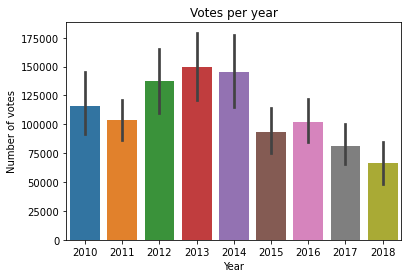

In [70]:
sns.barplot(x = 'year', y = 'numvotes', data=merged_data)
plt.title('Votes per year')
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.show()

2014 had the highest number of votes while 2019 had the least number of votes 

##### Get the average earnings or revenue per year

In [71]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [72]:
merged_data.groupby('year')['Worldwide Gross'].mean().sort_values(ascending=False)

year
2018    1.905569e+08
2017    1.894869e+08
2016    1.815058e+08
2013    1.807485e+08
2014    1.656570e+08
2012    1.635550e+08
2015    1.380609e+08
2011    1.219460e+08
2010    1.169798e+08
Name: Worldwide Gross, dtype: float64

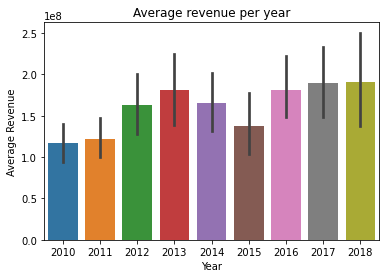

In [73]:
sns.barplot(x = 'year', y = 'Worldwide Gross', data=merged_data)
plt.title('Average revenue per year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

##### Number of movies per year

In [74]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [75]:
merged_data['year'].value_counts()

2011    204
2015    193
2016    191
2010    188
2012    181
2013    159
2017    157
2014    154
2018    134
Name: year, dtype: int64

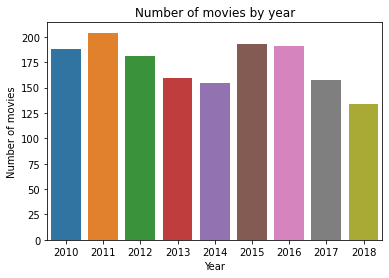

In [76]:
sns.countplot(x = 'year', data = merged_data)
plt.title("Number of movies by year")
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

Most popular movie(has highest revenue)

In [77]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [78]:
merged_data[merged_data['Worldwide Gross'].max() == merged_data['Worldwide Gross']]['title']

127797    Avengers: Infinity War
127835    Avengers: Infinity War
Name: title, dtype: object

##### Highest rated movies

In [79]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [80]:
top_10_rating = merged_data.nlargest(10,'averagerating')[['primary_title','averagerating']]\
.set_index('primary_title')
top_10_rating

,averagerating
primary_title,
The Runaways,9.2
The Wall,9.2
Skin Trade,8.8
Inception,8.8
Upgrade,8.8
Coriolanus,8.7
Interstellar,8.6
Lights Out,8.6
Kin,8.6


In [81]:
top_10_rating = merged_data.nlargest(10,'averagerating')[['primary_title','averagerating','genres']]\
.set_index('primary_title')
top_10_rating

,averagerating,genres
primary_title,,
The Runaways,9.2,Adventure
The Wall,9.2,Documentary
Skin Trade,8.8,Documentary
Inception,8.8,"Action,Adventure,Sci-Fi"
Upgrade,8.8,Drama
Coriolanus,8.7,"Drama,History,War"
Interstellar,8.6,"Adventure,Drama,Sci-Fi"
Lights Out,8.6,Drama
Kin,8.6,"Drama,Music"


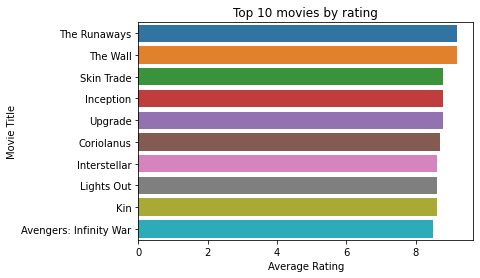

In [82]:
sns.barplot(x = 'averagerating', y = top_10_rating.index, data = top_10_rating)
plt.title('Top 10 movies by rating')
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

The Runways,the Wall and Skin trade are the top three rated movies

##### Top 10 directors by movie rating

In [83]:

merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [84]:
# merged_data.groupby('directors')['averagerating'].mean().sort_values(ascending=False)
top_10_directors = merged_data.nlargest(10,'averagerating')[['primary_name','averagerating']]\
.set_index('primary_name')
top_10_directors

,averagerating
primary_name,
Richard Heap,9.2
Ricardo Martinez,9.2
Shannon Keith,8.8
Christopher Nolan,8.8
Mike Erickson,8.8
Tim Van Someren,8.7
Christopher Nolan,8.6
Adam Shaw,8.6
Rachel Lambert,8.6


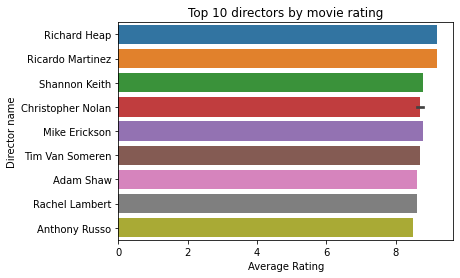

In [85]:
sns.barplot(x = 'averagerating', y = top_10_directors.index, data = top_10_directors)
plt.title('Top 10 directors by movie rating')
plt.xlabel("Average Rating")
plt.ylabel("Director name")
plt.show()

##### Top 10 directors by profit

In [86]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [87]:

top_10_dir_profit = merged_data.nlargest(10,'movie_profit')[['primary_name','movie_profit']]\
.set_index('primary_name')
top_10_dir_profit

,movie_profit
primary_name,
Anthony Russo,1.748360e+09
Joe Russo,1.748360e+09
Colin Trevorrow,1.454964e+09
James Wan,1.321986e+09
J.A. Bayona,1.138323e+09
Ryan Coogler,1.136494e+09
Adam Green,1.124590e+09
Chi-kin Kwok,1.124590e+09
Chris Buck,1.124590e+09


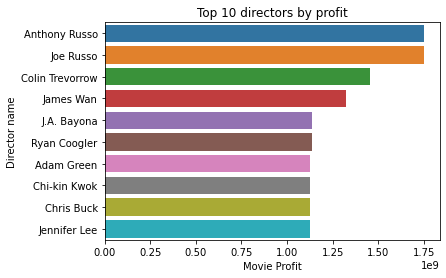

In [88]:
sns.barplot(x = 'movie_profit', y = top_10_dir_profit.index, data = top_10_dir_profit)
plt.title('Top 10 directors by profit')
plt.xlabel("Movie Profit")
plt.ylabel("Director name")
plt.show()

##### Display the top 10 movies and runtime

In [89]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [90]:
top_10_len = merged_data.nlargest(12,'runtime_minutes')[['primary_title','runtime_minutes']]\
.set_index('primary_title')
top_10_len

,runtime_minutes
primary_title,
Coriolanus,192.0
Another Year,181.0
The Wolf of Wall Street,180.0
Jab Tak Hai Jaan,176.0
Cloud Atlas,172.0
Cloud Atlas,172.0
Cloud Atlas,172.0
Dhoom 3,172.0
Sultan,170.0


In [91]:
# repeat = 'Cloud Atlas'
# repeat_data = merged_data.loc[merged_data['primary_title'] == repeat]
# repeat_data

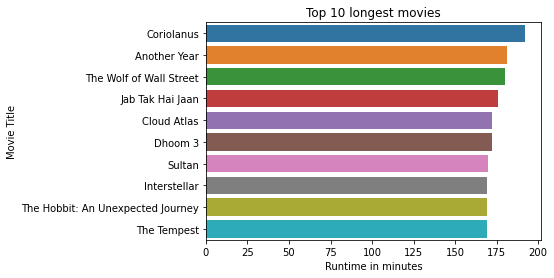

In [92]:
sns.barplot(x = 'runtime_minutes', y = top_10_len.index, data = top_10_len)
plt.title("Top 10 longest movies")
plt.xlabel("Runtime in minutes")
plt.ylabel("Movie Title")
plt.show()

Top 10 highest revenue movie titles

In [93]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit'],
      dtype='object')

In [94]:
merged_data.nlargest(15,'Worldwide Gross')['primary_title']

127797            Avengers: Infinity War
127835            Avengers: Infinity War
29321                     Jurassic World
42919                          Furious 7
126676           Avengers: Age of Ultron
155902                     Black Panther
30798     Jurassic World: Fallen Kingdom
277622                            Frozen
277787                            Frozen
277951                            Frozen
277999                            Frozen
323487                     Incredibles 2
43878            The Fate of the Furious
160030                        Iron Man 3
138540                           Minions
Name: primary_title, dtype: object

In [95]:
top_10_rev = merged_data.nlargest(14,'Worldwide Gross')[['primary_title', 'Worldwide Gross']]\
.set_index('primary_title')
top_10_rev

,Worldwide Gross
primary_title,
Avengers: Infinity War,2.048360e+09
Avengers: Infinity War,2.048360e+09
Jurassic World,1.669964e+09
Furious 7,1.511986e+09
Avengers: Age of Ultron,1.395317e+09
Black Panther,1.336494e+09
Jurassic World: Fallen Kingdom,1.308323e+09
Frozen,1.274590e+09
Frozen,1.274590e+09


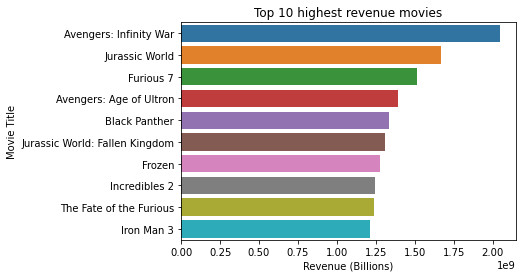

In [96]:
sns.barplot(x ='Worldwide Gross', y = top_10_rev.index, data = top_10_rev)
plt.title("Top 10 highest revenue movies")
plt.xlabel("Revenue (Billions)")
plt.ylabel("Movie Title")
plt.show()

##### Relationship between revenue, production budget agaisnt profitability

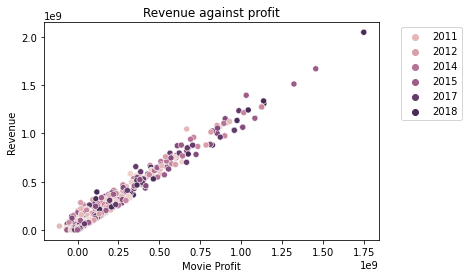

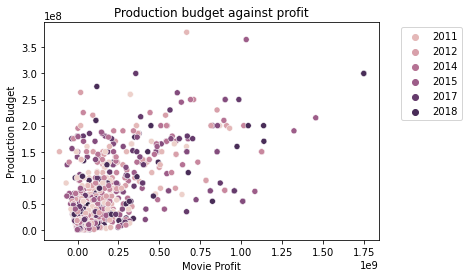

In [97]:
sns.scatterplot(x = 'movie_profit', y = 'Worldwide Gross', hue = "start_year", data = merged_data)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Revenue against profit")
plt.xlabel("Movie Profit")
plt.ylabel("Revenue")
plt.show()

sns.scatterplot(x = 'movie_profit', y = 'Production Budget',hue = "start_year", data = merged_data)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Production budget against profit")
plt.xlabel("Movie Profit")
plt.ylabel("Production Budget")
plt.show()

The revenue and profitability of movies is positively correlated.

The production budget does not have a linear relationship with the profitability of the movie

##### Classify Movies Based on Ratings (Excellent, Good, and Average)

In [98]:
def rating(rating):
    if rating >=7.0:
        return "Excellent"
    elif rating>= 6.0:
        return "Good"
    else:
        return "Average"

In [99]:
merged_data['rating_groups'] = merged_data['averagerating'].apply(rating)

In [100]:
merged_data.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,title,year,nconst,category,primary_name,Production Budget,Worldwide Gross,movie_profit,rating_groups
140,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,nm0758574,En el camino,2012,nm0758574,director,Walter Salles,25000000.0,9313302.0,-15686698.0,Good
286,tt4339118,On the Road,2014,89.0,Drama,6.0,6,nm7042169,Wo zai lu shang zui ai ni,2012,nm7042169,director,Poong-ki Kim,25000000.0,9313302.0,-15686698.0,Good
305,tt5647250,On the Road,2016,121.0,Drama,5.7,127,nm0935863,Love Song: Wolf Alice,2012,nm0935863,director,Michael Winterbottom,25000000.0,9313302.0,-15686698.0,Average
400,tt1233192,Brighton Rock,2010,111.0,"Crime,Drama,Thriller",5.7,5784,nm0423626,Le rocher de Brighton,2011,nm0423626,director,Rowan Joffe,11000000.0,229653.0,-10770347.0,Average
648,tt1374989,Pride and Prejudice and Zombies,2016,108.0,"Action,Comedy,Horror",5.8,46187,nm0824882,"Orgullo, prejuicio y zombies",2016,nm0824882,director,Burr Steers,28000000.0,16638300.0,-11361700.0,Average


##### Compare Rating against the Revenue

In [101]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit', 'rating_groups'],
      dtype='object')

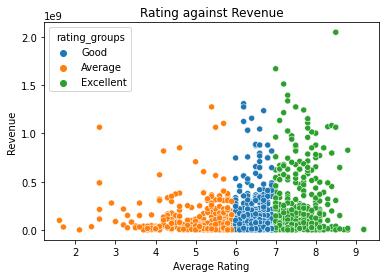

In [102]:
sns.scatterplot(x = 'averagerating', y = 'Worldwide Gross',hue='rating_groups', data = merged_data)
plt.title("Rating against Revenue")
plt.xlabel("Average Rating")
plt.ylabel("Revenue")
plt.show()

A higher rating does not necesarily translate to a higher revenue however more movies with a higher revenue had a ratinging of 6 and above

##### Unique values from genre

In [103]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit', 'rating_groups'],
      dtype='object')

In [104]:
merged_data['genres']

140       Adventure,Drama,Romance
286                         Drama
305                         Drama
400          Crime,Drama,Thriller
648          Action,Comedy,Horror
                   ...           
340515                      Drama
340519                Documentary
340522                Documentary
340606              Drama,Romance
340706                Documentary
Name: genres, Length: 1561, dtype: object

In [105]:
type('genres')

str

In [106]:
# split this column by adding commas after every item

list_genre = []

for value in merged_data['genres']:
    list_genre.append(value.split(','))

AttributeError: 'float' object has no attribute 'split'

In [107]:
list_genre

[['Adventure', 'Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Action', 'Comedy', 'Horror'],
 ['Drama', 'Music'],
 ['Biography', 'Drama', 'Sport'],
 ['Drama', 'Music'],
 ['Drama', 'Music'],
 ['Adventure', 'Comedy', 'Family'],
 ['Biography', 'Drama', 'Music'],
 ['Adventure'],
 ['Drama'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Action', 'Adventure', 'Drama'],
 ['Drama', 'War'],
 ['Action', 'Comedy', 'Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Horror', 'Mystery'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Sport'],
 ['Biography', 'Crime', 'Drama'],
 ['Adventure', 'Comedy', 'Family'],
 ['Comedy', 'Romance'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Action', 'History'],
 ['Crime', 'Drama'],
 ['Drama', 'Sport'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Thriller'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Biography', '

In [108]:
# Convert in to one dimensional list

one_d_genre = []
for x in list_genre:
    for y in x:
        one_d_genre.append(y)

In [109]:
one_d_genre

['Adventure',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Comedy',
 'Horror',
 'Drama',
 'Music',
 'Biography',
 'Drama',
 'Sport',
 'Drama',
 'Music',
 'Drama',
 'Music',
 'Adventure',
 'Comedy',
 'Family',
 'Biography',
 'Drama',
 'Music',
 'Adventure',
 'Drama',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Mystery',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Sport',
 'Biography',
 'Crime',
 'Drama',
 'Adventure',
 'Comedy',
 'Family',
 'Comedy',
 'Romance',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Action',
 'History',
 'Crime',
 'Drama',
 'Drama',
 'Sport',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Adventure',
 'Comedy',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Come

In [110]:
# find unique vales in this list

unique_genres = []
for x in one_d_genre:
    if x not in unique_genres:
        unique_genres.append(x)


In [111]:
unique_genres

['Adventure',
 'Drama',
 'Romance',
 'Crime',
 'Thriller',
 'Action',
 'Comedy',
 'Horror',
 'Music',
 'Biography',
 'Sport',
 'Family',
 'Fantasy',
 'War',
 'Sci-Fi',
 'Mystery',
 'Documentary',
 'History',
 'Animation']

In [112]:
print("There are ",len(unique_genres) , "genres in the dataset")

There are  19 genres in the dataset


##### Number of movies per genre

In [113]:
one_d_genre

['Adventure',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Comedy',
 'Horror',
 'Drama',
 'Music',
 'Biography',
 'Drama',
 'Sport',
 'Drama',
 'Music',
 'Drama',
 'Music',
 'Adventure',
 'Comedy',
 'Family',
 'Biography',
 'Drama',
 'Music',
 'Adventure',
 'Drama',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Mystery',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Sport',
 'Biography',
 'Crime',
 'Drama',
 'Adventure',
 'Comedy',
 'Family',
 'Comedy',
 'Romance',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Action',
 'History',
 'Crime',
 'Drama',
 'Drama',
 'Sport',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Adventure',
 'Comedy',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Come

In [114]:
from collections import Counter

In [115]:
Counter(one_d_genre)

Counter({'Adventure': 13,
         'Drama': 39,
         'Romance': 7,
         'Crime': 7,
         'Thriller': 5,
         'Action': 7,
         'Comedy': 14,
         'Horror': 5,
         'Music': 5,
         'Biography': 8,
         'Sport': 3,
         'Family': 2,
         'Fantasy': 2,
         'War': 1,
         'Sci-Fi': 4,
         'Mystery': 2,
         'Documentary': 1,
         'History': 2,
         'Animation': 2})

Directors that make popular movies(with high revenue)

In [116]:
merged_data.columns

Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'title', 'year', 'nconst',
       'category', 'primary_name', 'Production Budget', 'Worldwide Gross',
       'movie_profit', 'rating_groups'],
      dtype='object')

In [117]:
top_10_rev_dir = merged_data.nlargest(10,'Worldwide Gross')[['primary_name', 'Worldwide Gross']]\
.set_index('primary_name')
top_10_rev_dir

,Worldwide Gross
primary_name,
Anthony Russo,2.048360e+09
Joe Russo,2.048360e+09
Colin Trevorrow,1.669964e+09
James Wan,1.511986e+09
Joss Whedon,1.395317e+09
Ryan Coogler,1.336494e+09
J.A. Bayona,1.308323e+09
Adam Green,1.274590e+09
Chi-kin Kwok,1.274590e+09


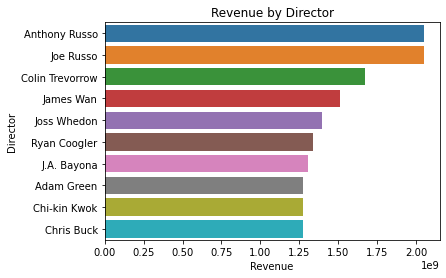

In [118]:
sns.barplot(x = 'Worldwide Gross', y = top_10_rev_dir.index, data = top_10_rev_dir)
plt.title("Revenue by Director")
plt.xlabel('Revenue')
plt.ylabel('Director')
plt.show()

I would advise Microsoft to pick the top directors Anthony Russo and  Joe Russo. Since they are highly rated and they produce succesful movies, they are a great option to start off the Microsoft studio in choices of the genres to focus on and actors to consider.
